In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Lets make sythentic data points.
from sklearn.datasets import make_classification

In [4]:
x,y=make_classification(n_samples=1000,
                        n_features=2, 
                        n_classes=2,
                        n_redundant=0,
                        n_clusters_per_class=2,
                       )

In [5]:
x

array([[ 0.97420298,  0.2772159 ],
       [ 1.42270211, -1.21799243],
       [-3.18359815, -2.71138428],
       ...,
       [-1.91976713, -1.38407876],
       [-0.83550349, -1.01295055],
       [-2.34779486, -2.05102945]])

In [8]:
y[1:20]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [9]:
df=pd.DataFrame(x, columns=['f1','f2'])

In [11]:
df['target']=y

In [12]:
df.head()

,f1,f2,target
0,0.974203,0.277216,1
1,1.422702,-1.217992,0
2,-3.183598,-2.711384,0
3,-1.015703,-1.055140,1
4,-1.855009,-1.649992,0


## Scatter chat

<AxesSubplot: xlabel='f1', ylabel='f2'>

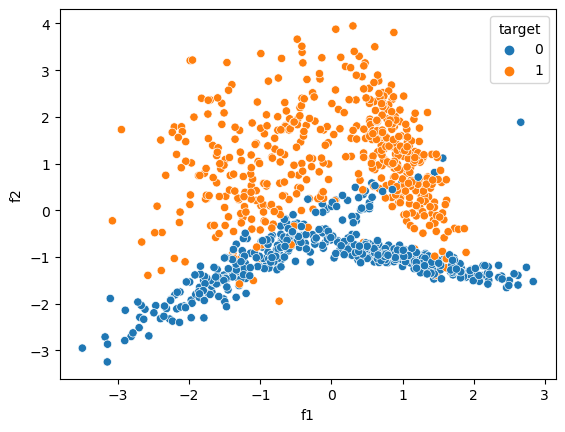

In [14]:
sns.scatterplot(x=df['f1'],y=df['f2'], hue=df['target'])

## Spliting the data into train and test.

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,
                                                  y,
                                                  test_size=0.25, 
                                                  random_state=42,
                                                 )

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

 ## Support vector machine classifier.

In [20]:
from sklearn.svm import SVC

In [22]:
obj_of_svc=SVC(kernel='linear')

In [23]:
obj_of_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [24]:
obj_of_svc.coef_

array([[-0.04960413,  2.02009897]])

In [27]:
y_predict=obj_of_svc.predict(x_test)

In [28]:
y_predict

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1])

## To check the accuracy of the model

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[107  14]
 [ 16 113]]
0.88
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       121
           1       0.89      0.88      0.88       129

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



## Hyperparamter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear'],
}

In [41]:
obj_grid=GridSearchCV(obj_of_svc, param_grid=param_grid, cv=5,verbose=3)

In [42]:
obj_grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [43]:
obj_grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [44]:
y_pre=obj_grid.predict(x_test)

In [45]:
print(accuracy_score(y_test, y_pre))
print(confusion_matrix(y_test, y_pre))
print(classification_report(y_test, y_pre))

0.88
[[107  14]
 [ 16 113]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       121
           1       0.89      0.88      0.88       129

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

